# TP : Linear regression

In [2]:
import pandas as pd
import numpy as np
from matplotlib import cm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy import stats
from sklearn import linear_model as lm

## Exercice 1. (Analyse de la base de données “investment data”)

La lecture d’un tutoriel pandas pourra être utile : http://pandas.pydata.org/pandas-docs/stable/tutorials.html. Nous travaillons sur la base de données Investment Data Set 1 qui peut être téléchargée depuis https://bitbucket.org/portierf/shared_files/downloads/invest.txt. Avant de commencer, on réalisera l’exercice 12 du polycopié : ”explicit formulas when p “ 1 for prediction intervals", se trouvant dans le chapitre 3 : “Confidence intervals and hypothesis testing”. On pourra aussi lire la section 3.1.1 de ce même chapitre du polycopié.

1) Importer la base de données “invest.txt” et l’afficher dans une forme lisible, e.g. une table contenant les 5 premières observations.

In [3]:
# df_invest = pd.read_csv("https://bitbucket.org/portierf/shared_files/downloads/invest.txt", " ")
df_invest = pd.read_csv("https://bitbucket.org/portierf/shared_files/downloads/invest.txt", " ")
df_invest.head(5)

,year,gnp,invest,cpi,interest
0,1968,873.4,133.3,82.54,5.16
1,1969,944.0,149.3,86.79,5.87
2,1970,992.7,144.2,91.45,5.95
3,1971,1077.6,166.4,96.01,4.88
4,1972,1185.9,195.0,100.00,4.50


2) Réaliser le graph suivant : la variable “Gross National Product” (GNP, column “gnp”) est en abscisse et la variable “Investment” (column “invest”) est en ordonnée. Transformer les 2 variables précédentes en échelle logarithmique. Nous travaillerons désormais avec les 2 nouvelles variables.

NOTE : Lorsque l’on traite des données monétaires, on travaille souvent en échelle logarithmique (pour
prendre en compte les différences d’échelle).

<IPython.core.display.Javascript object>


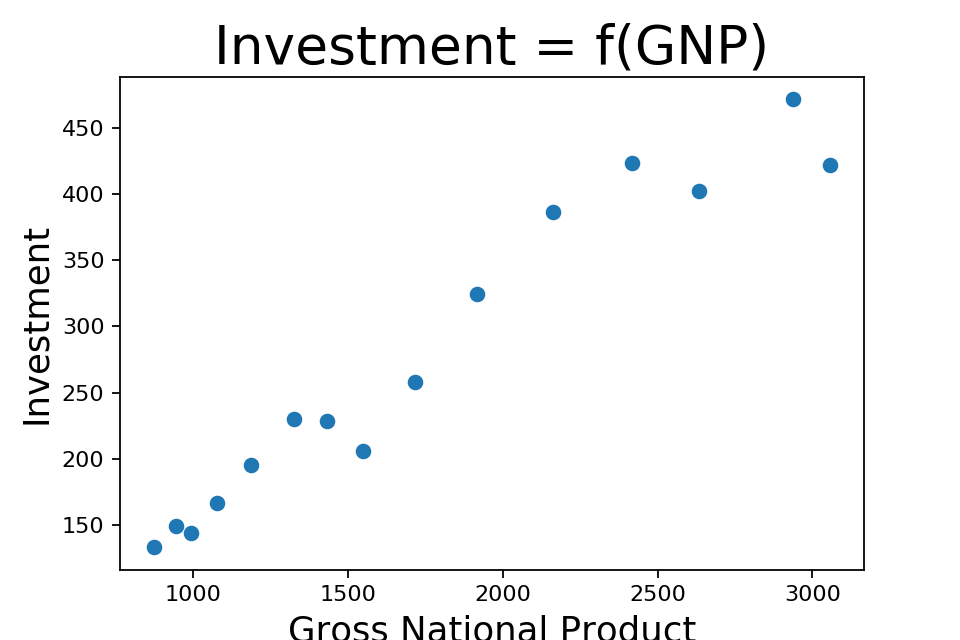

In [4]:
plt.figure(num=1, figsize=(6, 4), dpi=80, facecolor='w', edgecolor='k')

plt.plot(df_invest["gnp"],df_invest["invest"], "o")
plt.xlabel("Gross National Product", fontsize=16)
plt.ylabel("Investment", fontsize=16)
plt.title("Investment = f(GNP)", fontsize=24)

plt.show()

In [5]:
df_invest["invest"] = np.log(df_invest["invest"])
df_invest["gnp"] = np.log(df_invest["gnp"])

Les questions suivantes (3 à 6) doivent être réalisées par l’intermédiaire d’opérations élémentaires,
sans utiliser de librairies existantes.

3) Pour la régression de ”Investment” (variable à expliquer, output) sur ”GNP” (variable explicative, covariable), estimer l’intercept et la pente, leurs écart-types, ainsi que le coefficient de détermination. Les afficher dans une forme lisible. Dans la suite le vecteur contenant l’intercept et la pente est noté $  \hat{\theta}_{n} \in \mathbb{R}^{2}$.

In [6]:
#On note x le vecteur correspondant aux observations de GNP
#et respectivement y le vecteur correspondante à l'observation de l'investissement.
x = df_invest["gnp"]
y = df_invest["invest"]
n = x.count()
xmean = np.sum(x) / n
ymean = np.sum(y) / n

#Calcul des estimateurs de l'intercept et de la pente
theta1 = np.sum((x-xmean)*(y-ymean))/np.sum((x-xmean)**2)
theta0 = ymean - theta1 * xmean
print("theta0 : " + str(theta0) + ", theta1 : " + str(theta1))

#Cacul des écart-types
coeff = np.sum((y-(theta0+theta1*x))**2)/(n-2)
ecart_type_theta0 = np.sqrt(coeff * (1/n + xmean**2/sum((x-xmean)**2)))
ecart_type_theta1 = np.sqrt(coeff / np.sum((x-xmean)**2))
print("écart-type theta0 : " + str(ecart_type_theta0) + ", écart-type theta1 : " + str(ecart_type_theta1))

#Coefficient de détermination
coeff_determination = 1 - np.sum((y-theta0-theta1*x)**2)/np.sum((y-ymean)**2)
print("coefficient de détermination : " + str(coeff_determination))

theta0 : -1.9635913352301815, theta1 : 1.015281401598871
écart-type theta0 : 0.4095472716623081, écart-type theta1 : 0.05538306035485281
coefficient de détermination : 0.9627572956057857


4) La pente estimée précédemment est-elle statistiquement significative ? On fera un test de student ($t-test$). Donner la valeur de la statistique de test ainsi que la $p$-valeur.


In [7]:
#On teste la nullité du coefficient de régression:
theta1_test = 0

#On calcule la valeur statistique pour theta1
val_statistique_theta1 = (theta1 - theta1_test)/ecart_type_theta1
print("valeur statistique theta1 : " + str(val_statistique_theta1))

#On calcule la p-value pour theta1
p_value_theta1 = 2*(1-stats.t.cdf(np.abs(val_statistique_theta1), n-2))
print( "p-value theta1 : " + str(p_value_theta1))

print("La p-value est très faible, on peut donc rejeter le test.")

valeur statistique theta1 : 18.331984456866678
p-value theta1 : 1.1363709973011282e-10
La p-value est très faible, on peut donc rejeter le test.


5) Pour GNP égal à 1000, estimer l’investissement prédit par le modèle. Pour GNP égal à 1000, donner l’intervalle de confiance pour la valeur prédite et l’intervalle de confiance pour la variable à expliquer “Investment”, au niveau 90%. On pourra se référer à la section 3.1.3 “Confidence intervals for the predicted values” du polycopié dans laquelle chaque intervalle est défini, CI$(x)$ et PI$(x)$, respectivement (avec les notations du polycopié, $x = (1, 1000)^T$).

In [8]:
#Calcul de la valeur de prédiction
GNP = np.log(1000)
prediction = theta0 + theta1 * GNP
print("prédiction : " + str(prediction))

#Calcul de l'intervalle de confiance au niveau 90% pour la valeur à expliquer
coeff2 = np.sqrt(coeff*(1/n + (GNP-xmean)**2/np.sum((x-xmean)**2)))
intervalle_investment = [prediction - coeff2*stats.t.ppf(0.95,n-2),
                        prediction + coeff2*stats.t.ppf(0.95,n-2)]
print("IC de la valeur à expliquer CI : " + str(intervalle_investment))

#Calcul de l'intervalle de confiance au niveau 90% pour la valeur prédite
coeff3 = np.sqrt(coeff*((1 + 1/n) + (GNP-xmean)**2/np.sum((x-xmean)**2)))
intervalle_prediction = [prediction - coeff3*stats.t.ppf(0.95,n-2),
                         prediction + coeff3*stats.t.ppf(0.95,n-2)]
print("IC de la valeur prédite PI : " + str(intervalle_prediction))

prédiction : 5.049724126316802
IC de la valeur à expliquer CI : [4.98822284597111, 5.111225406662493]
IC de la valeur prédite PI : [4.882820023438681, 5.216628229194923]


6) Sur un graphe avec échelle logarithmique, avec GNP en abscisse et investment en ordonnée, tracer les données, la droite de régression, ainsi que les intervalle CI et PI (pour toutes les valeurs de log(GNP) comprises entre le maximum et le minimum observé sur les données)

<IPython.core.display.Javascript object>


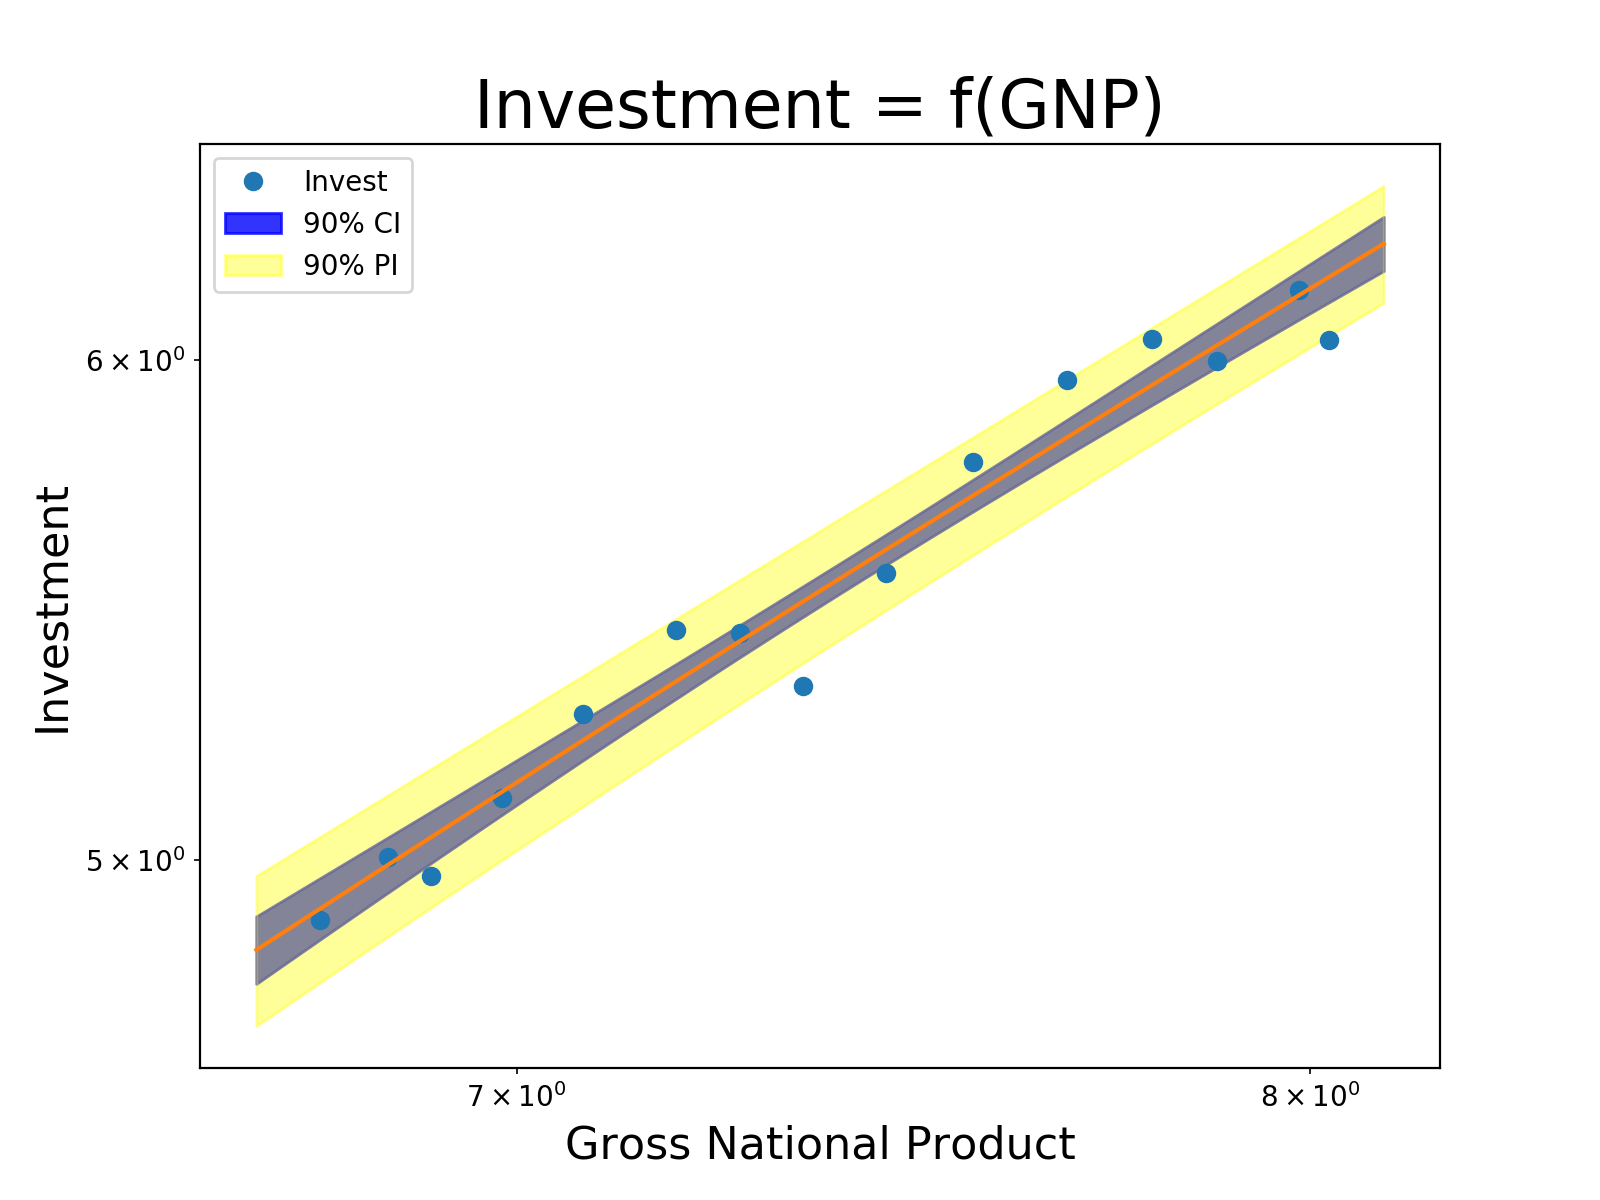

In [9]:
plt.figure(2, figsize=(8, 6))

plt.yscale("log")
plt.xscale("log")
x_grid = np.linspace(6.7, 8.1)
plt.xlabel("Gross National Product", fontsize=16)
plt.ylabel("Investment", fontsize=16)
plt.title("Investment = f(GNP)", fontsize=24)


# données : Invest =f(GNP)
plt.plot(x, y, "o", label = "Invest")

# droite de régression
plt.plot(x_grid, theta0 + theta1*x_grid, "-")

# droite de régression
plt.fill_between(x_grid,
                 (lambda xvar: (theta0+theta1*xvar) - np.sqrt(coeff*(1/n + (xvar-xmean)**2/np.sum((x-xmean)**2)))*stats.t.ppf(0.90,n-2))(x_grid),
                 (lambda xvar: (theta0+theta1*xvar) + np.sqrt(coeff*(1/n + (xvar-xmean)**2/np.sum((x-xmean)**2)))*stats.t.ppf(0.90,n-2))(x_grid),
                 color = 'blue', alpha = 0.8, label = '90% CI')

plt.fill_between(x_grid,
                 (lambda xvar: (theta0+theta1*xvar) - np.sqrt(coeff*(1 + 1/n + (xvar-xmean)**2/np.sum((x-xmean)**2)))*stats.t.ppf(0.90,n-2))(x_grid),
                 (lambda xvar: (theta0+theta1*xvar) + np.sqrt(coeff*(1 + 1/n + (xvar-xmean)**2/np.sum((x-xmean)**2)))*stats.t.ppf(0.90,n-2))(x_grid),
                 color = 'yellow', alpha = 0.4, label = '90% PI')

plt.legend()
plt.show()

7) En utilisant des classes/librairies existantes, donner l’intercept, la pente, le coefficient de détermination ainsi que l’investissement prédit par le modèle quand GNP vaut 1000 La classe LinearRegression() de sklearn.linear_model est suggérée mais pas obligatoire. Vérifier que les valeurs calculées ici coïncident avec celles des questions précédentes.

In [10]:
skl_lm = lm.LinearRegression(fit_intercept=True)
skl_lm.fit(df_invest[["gnp"]], df_invest["invest"])

#Mise en place de la régression linéaire et détermination des paramètres liés au modèle
theta0_regression = skl_lm.intercept_
theta1_regression = skl_lm.coef_[0]
coeff_determination_regression = skl_lm.score(df_invest[["gnp"]], df_invest["invest"])
prediction_regression = skl_lm.predict(np.log(1000))[0]
print("intercept : " + str(theta0_regression))
print ("pente : " + str(theta1_regression))
print("coefficient de détermination : " + str(coeff_determination_regression))
print("prédiction pour GNP=log(1000) : " + str(prediction_regression))

#Test des valeurs avec les calculs effectués précédemment
if np.isclose(theta0, theta0_regression) and np.isclose(theta1, theta1_regression) and np.isclose(coeff_determination, coeff_determination_regression) and np.isclose(prediction, prediction_regression):
    print("Les valeurs liées à la regression linéaire correspondent aux calculs.")
else: print("Les valeurs liées à la regression linéaire ne correspondent pas aux calculs.")

intercept : -1.9635913352301815
pente : 1.015281401598871
coefficient de détermination : 0.9627572956057855
prédiction pour GNP=log(1000) : 5.049724126316802
Les valeurs liées à la regression linéaire correspondent aux calculs.


8) Sur un graph avec échelle logarithmique, avec GNP en abscisse et investment en ordonnée, tracer les données, la droite de régression, ainsi que l’investissement prédit par le modèle quand GNP vaut 1000 (on donnera à ce point une couleur différente).

<IPython.core.display.Javascript object>


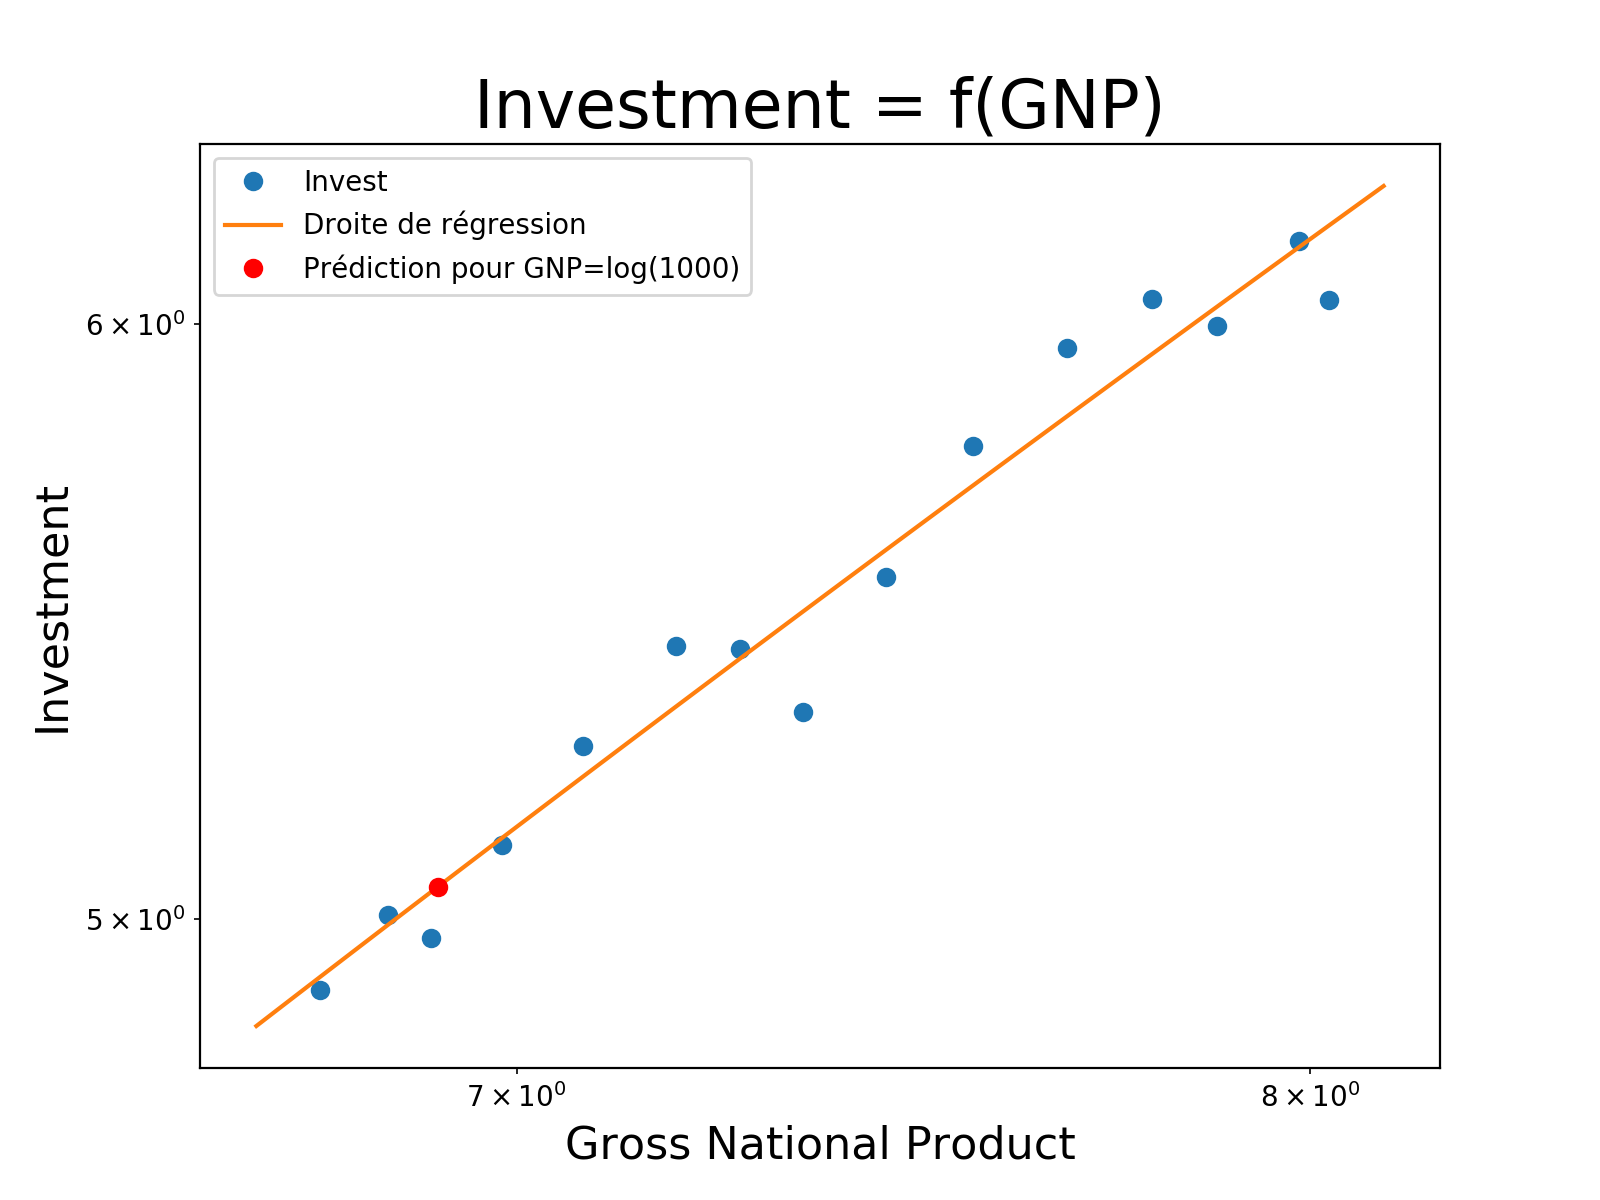

In [11]:
plt.figure(3, figsize=(8, 6))

plt.yscale("log")
plt.xscale("log")
x_grid = np.linspace(6.7, 8.1)
plt.xlabel("Gross National Product", fontsize=16)
plt.ylabel("Investment", fontsize=16)
plt.title("Investment = f(GNP)", fontsize=24)

# # données : Invest =f(GNP)
plt.plot(x, y, "o", label = "Invest")

# # droite de régression
plt.plot(x_grid, skl_lm.predict(x_grid.reshape(x_grid.shape[0], 1)), "-", label="Droite de régression")

# point particulier (log(GNP) = log(1000))
plt.plot([np.log(1000)], prediction_regression, "o", color="red", label="Prédiction pour GNP=log(1000)")

plt.legend()
plt.show()

NOTE : On introduit une nouvelle variable explicative, la variable interest (sans transformation logarithmique). Les questions suivantes (9 à 12) doivent être réalisées par l’intermédiaire d’opérations élémentaires, sans utiliser de librairies existantes (on utilisera par exemple inv et eig de numpy.linalg).

9) Pour la régression de Investment sur GNP et interest, calculer la matrice de Gram. Est-elle de rang plein ?

In [12]:
# On pose X la matrice des variables explicatives et G la matrice de Gram
one_matrix = np.ones(n)
X_GNP = np.array(df_invest["gnp"])
X_interest = np.array(df_invest["interest"])
X = np.array([one_matrix, X_GNP, X_interest]).T
G = np.dot(X.T, X)
print(X)
print(G)

[[ 1.          6.77239364  5.16      ]
 [ 1.          6.85012617  5.87      ]
 [ 1.          6.9004285   5.95      ]
 [ 1.          6.98249163  4.88      ]
 [ 1.          7.07825726  4.5       ]
 [ 1.          7.19022378  6.44      ]
 [ 1.          7.26836248  7.83      ]
 [ 1.          7.34549395  6.25      ]
 [ 1.          7.4489161   5.5       ]
 [ 1.          7.55919466  5.46      ]
 [ 1.          7.67966743  7.46      ]
 [ 1.          7.79061331 10.28      ]
 [ 1.          7.87591714 11.77      ]
 [ 1.          7.98538224 13.42      ]
 [ 1.          8.02535287 11.02      ]]
[[ 15.         110.75282116 111.79      ]
 [110.75282116 820.24847688 839.18854302]
 [111.79       839.18854302 943.8557    ]]


In [13]:
valeurs_prores = np.linalg.eigvalsh(G)
print("La matrice G de taille " + str(G.shape) +
      " admet trois valeurs propres distinctes égales à : " + str(valeurs_prores[0]) + 
      ", " + str(valeurs_prores[1]) +
      " et " + str(valeurs_prores[2]))
print("G est donc de rang plein, on en déduit que G est inversible.")

La matrice G de taille (3, 3) admet trois valeurs propres distinctes égales à : 0.018236969698052344, 41.214036229294116 et 1737.8719036767338
G est donc de rang plein, on en déduit que G est inversible.


10) Pour la régression de Investment sur GNP et interest, estimer les 3 coefficients et leurs écarttypes ainsi que le coefficient de détermination. En plus, faire un test de Student de significativité de chaque coefficient (donner la statistique de test et la $p$-valeur). Afficher les résultats dans une forme convenable. Discuter de la significativité des coefficients.

In [14]:
#D'après l'équation normale et l'unicité du vecteur des coefficients (qu'on notera theta), on a l'égalité suivante:
Y = np.array([df_invest["invest"]]).T
theta = np.dot(np.linalg.inv(G), np.dot(X.T,Y))
print("theta0 : " + str(theta[0]) +
      ", theta1 : " + str(theta[1]) +
      " et theta2 : " + str(theta[2]))

#Cacul des écart-types
e1 = np.array([1,0,0])
e2 = np.array([0,1,0])
e3 = np.array([0,0,1])

coeff4 = np.sum((Y-np.dot(X, theta))**2)/(n-3)
ecart_type_theta0 = np.sqrt(coeff4 * np.dot(e1.T, np.dot(np.linalg.inv(G),e1)))
ecart_type_theta1 = np.sqrt(coeff4 * np.dot(e2.T, np.dot(np.linalg.inv(G),e2)))
ecart_type_theta2 = np.sqrt(coeff4 * np.dot(e3.T, np.dot(np.linalg.inv(G),e3)))
print("écart-type theta0 : " + str(ecart_type_theta0) +
      ", écart-type theta1 : " + str(ecart_type_theta1) +
      " et écart-type theta2 : " + str(ecart_type_theta2))

# #Coefficient de détermination
coeff_determination = 1 - np.sum((Y-np.dot(X, theta))**2)/np.sum((Y-ymean)**2)
print("coefficient de détermination : " + str(coeff_determination))

#On teste la nullité des coefficients:
theta1_test = 0
theta2_test = 0

val_statistique_theta1 = (theta[1] - theta1_test)/ecart_type_theta1
val_statistique_theta2 = (theta[2] - theta2_test)/ecart_type_theta2

print("valeur statistique theta1 : " + str(val_statistique_theta1) + "\n" +
      "valeur statistique theta2 : " + str(val_statistique_theta2))

p_value_theta1 = 2*(1-stats.t.cdf(np.abs(val_statistique_theta1), n-3))
p_value_theta2 = 2*(1-stats.t.cdf(np.abs(val_statistique_theta2), n-3))

print("p-value theta1 : " + str(p_value_theta1) + "\n" +
      "p-value theta2 : " + str(p_value_theta2))

print("Conclusion : On peut rejeter le test pour theta1, cependant pas pour theta2 car sa valeur est élevée")

theta0 : [-2.18045473], theta1 : [1.05124269] et theta2 : [-0.00652888]
écart-type theta0 : 0.6623991977963776, écart-type theta1 : 0.10206137806192447 et écart-type theta2 : 0.015344205065604357
coefficient de détermination : 0.9633108306726244
valeur statistique theta1 : [10.30010285]
valeur statistique theta2 : [-0.4254948]
p-value theta1 : [2.59951685e-07]
p-value theta2 : [0.67800714]
Conclusion : On peut rejeter le test pour theta1, cependant pas pour theta2 car sa valeur est élevée


11) Pour les valeurs de GNP 1000 et interest 10, i.e., $x = (1, 1000, 10)^T$, prédire log(investment) et donner les intervalles de confiance CI$(x)$ et PI$(x)$ au niveau 99,9%.

In [15]:
#Calcul de la valeur de prédiction
GNP = np.log(1000)
interest = 10
X_GNP_mean = X_GNP.mean()
X_interest_mean = X_interest.mean()
prediction = theta[0] + theta[1]*GNP + theta[2]*interest
print("prédiction : " + str(prediction[0]))

#Calcul des intervalles de confiance au niveau 99,9% :
def getICIP(alpha,XX,X,Theta,sig):
    
    x = np.array([1]+XX)
    q = stats.t.ppf(1 - alpha/2, X.shape[0] - np.linalg.matrix_rank(X))
    Cinf = np.dot(x.T,Theta) - sig * q * np.sqrt(np.dot(np.dot(x.T,np.linalg.inv(np.dot(X.T,X))),x))
    Csup = np.dot(x.T,Theta) + sig * q * np.sqrt(np.dot(np.dot(x.T,np.linalg.inv(np.dot(X.T,X))),x))

    Pinf = np.dot(x.T,Theta) - sig * q * np.sqrt(1+np.dot(np.dot(x.T,np.linalg.inv(np.dot(X.T,X))),x))
    Psup = np.dot(x.T,Theta) + sig * q * np.sqrt(1+np.dot(np.dot(x.T,np.linalg.inv(np.dot(X.T,X))),x))
    
    return Cinf,Csup,Pinf,Psup

ICinf,ICsup,PIinf,PIsup=getICIP(.001,[np.log(1000),10],X,theta,np.sqrt(coeff4))
print("IC de la valeur à expliquer CI : [" + str(ICinf[0])+"," + str(ICsup[0]) + "]")
print("IC de la valeur prédite PI : [" + str(PIinf[0])+"," + str(PIsup[0]) + "]")

prédiction : 5.015983730483181
IC de la valeur à expliquer CI : [4.640184036688575,5.3917834242777865]
IC de la valeur prédite PI : [4.4738033436407605,5.558164117325601]


12) Sur un même graph à 3 dimensions avec les axes suivants : log(GNP), Interest, and log(Investment), tracer les données, le “plan” de régression et les surfaces correspondantes aux intervalles de confiance à 99,9% (ces surfaces seront tracées sur le domaine de définition des données).

<IPython.core.display.Javascript object>


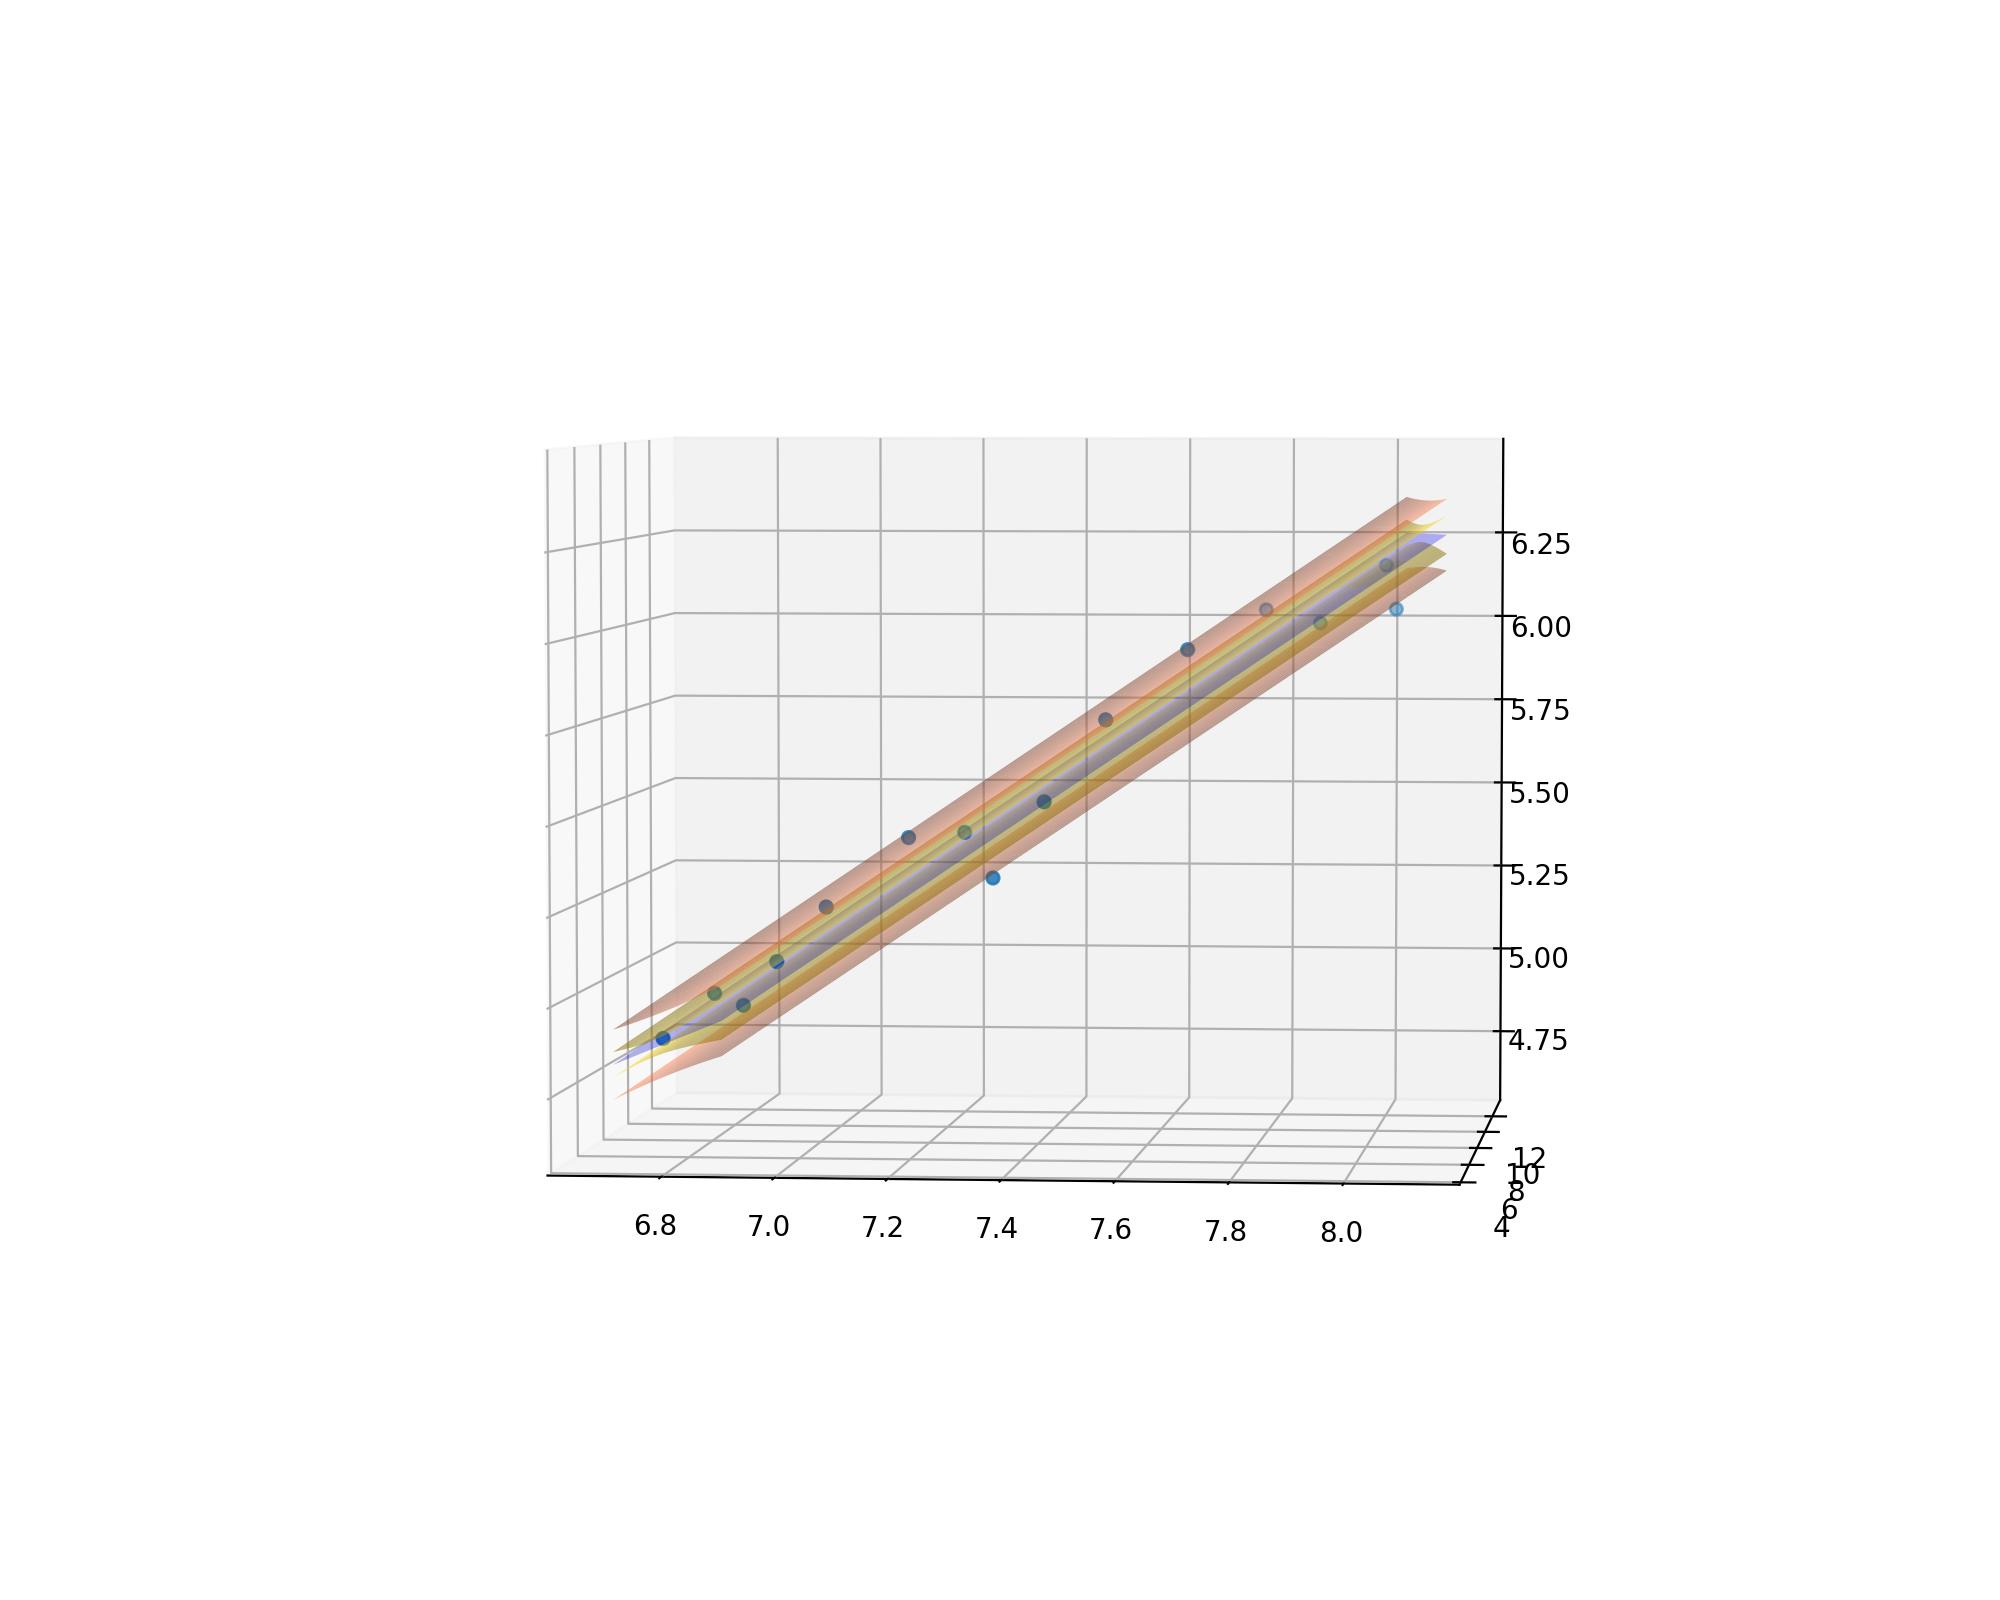

In [16]:
%matplotlib notebook

fig = plt.figure(4, figsize=(10, 8))
ax = fig.gca(projection='3d')

#Configuration de l'animation du graphe 3D
for angle in range(0, 360):
   ax.view_init(30, angle)
   plt.draw()
   plt.pause(.005)

#Représentation des données d'observation
ax.scatter(X_GNP.T, X_interest.T, Y, label="Données")

#Représentation du plan de régression
x_grid = np.linspace(6.7, 8.1, 20)
y_grid = np.linspace(4.4, 13.5, 20)
x_grid, y_grid = np.meshgrid(x_grid, y_grid)
Z = theta[0] + theta[1]*x_grid + theta[2]*y_grid
ax.plot_surface(x_grid, y_grid, Z, color='blue', alpha=0.3, label="Plan de régression")

# Représentation de l'intervalle CI
def Z_CI_upper(xvar, yvar):
    return (theta[0]+theta[1]*xvar+theta[2]*yvar)+np.sqrt(coeff4*(1/n + ((xvar-X_GNP_mean)**2+(yvar-X_interest_mean)**2)/np.sum((X_GNP-X_GNP_mean)**2+(X_interest-X_interest_mean)**2)))
def Z_CI_lower(xvar, yvar):
    return (theta[0]+theta[1]*xvar+theta[2]*yvar)-np.sqrt(coeff4*(1/n + ((xvar-X_GNP_mean)**2+(yvar-X_interest_mean)**2)/np.sum((X_GNP-X_GNP_mean)**2+(X_interest-X_interest_mean)**2)))
ax.plot_surface(x_grid, y_grid, Z_CI_upper(x_grid,y_grid), color="gold", alpha=0.5)
ax.plot_surface(x_grid, y_grid, Z_CI_lower(x_grid,y_grid), color="gold", alpha=0.5)
    
#Représentation de l'intervalle PI
def Z_PI_upper(xvar, yvar):
    return (theta[0]+theta[1]*xvar+theta[2]*yvar)+np.sqrt(coeff4*(1 + 1/n + ((xvar-X_GNP_mean)**2+(yvar-X_interest_mean)**2)/np.sum((X_GNP-X_GNP_mean)**2+(X_interest-X_interest_mean)**2)))
def Z_PI_lower(xvar, yvar):
    return (theta[0]+theta[1]*xvar+theta[2]*yvar)-np.sqrt(coeff4*(1 + 1/n + ((xvar-X_GNP_mean)**2+(yvar-X_interest_mean)**2)/np.sum((X_GNP-X_GNP_mean)**2+(X_interest-X_interest_mean)**2)))
ax.plot_surface(x_grid, y_grid, Z_PI_upper(x_grid,y_grid), color="coral", alpha=0.5)
ax.plot_surface(x_grid, y_grid, Z_PI_lower(x_grid,y_grid), color="coral", alpha=0.5)

plt.show()

13) En utilisant des classes/librairies existantes, donner les coefficients de régression, le coefficient de détermination ainsi que l’investissement prédit par le modèle quand GNP vaut 1000 et interest 10. La classe LinearRegression() de sklearn.linear_model est suggérée mais pas obligatoire. Vérifier que les valeurs calculées ici coïncident avec celles des questions précédentes.

In [16]:
skl_lm2 = lm.LinearRegression(fit_intercept=True)

#Pour l'utilisation de la fonction on ne prend pas en compte la colonne de 1 dans la matrice des variables explicatives
X_tilde = np.array([X_GNP, X_interest]).T
skl_lm2.fit(X_tilde, Y)

#Mise en place de la régression linéaire et détermination des paramètres liés au modèle
theta0_regression = skl_lm2.intercept_[0]
theta1_regression = skl_lm2.coef_[0][0]
theta2_regression = skl_lm2.coef_[0][1]
coeff_determination_regression = skl_lm2.score(X_tilde, Y)

#Prédiction pour (GNP=log(1000) et interest=10)
X_tilde_test = np.array([[np.log(1000), 10]])
prediction_regression = skl_lm2.predict(X_tilde_test)[0][0]

print("intercept : " + str(theta0_regression))
print ("pente_1 : " + str(theta1_regression))
print ("pente_2 : " + str(theta2_regression))
print("coefficient de détermination : " + str(coeff_determination_regression))
print("prédiction pour (GNP=log(1000), interest=10) : " + str(prediction_regression))

#Test des valeurs avec les calculs effectués précédemment
if np.isclose(theta[0], theta0_regression) and np.isclose(theta[1], theta1_regression)  and np.isclose(theta[2], theta2_regression) and np.isclose(coeff_determination, coeff_determination_regression) and np.isclose(prediction, prediction_regression):
    print("Les valeurs liées à la regression linéaire correspondent aux calculs.")
else: print("Les valeurs liées à la regression linéaire ne correspondent pas aux calculs.")

intercept : -2.1804547259114004
pente_1 : 1.0512426913196595
pente_2 : -0.006528879406068252
coefficient de détermination : 0.9633108306726245
prédiction pour (GNP=log(1000), interest=10) : 5.0159837304826835
Les valeurs liées à la regression linéaire correspondent aux calculs.
